# Datasets & Data Loaders

https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

`torch.utils.data.DataLoader`

`torch.utils.data.Dataset`

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Loading dataset

In [3]:
training_data = datasets.FashionMNIST(
    root="data", # path where data is stored
    train=True,
    download=True,
    # Convert a PIL Image or ndarray to tensor and scale the values accordingly.
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",  # path where data is stored
    train=False,
    download=True,
    # Convert a PIL Image or ndarray to tensor and scale the values accordingly.
    transform=ToTensor()
)

### Indexing and Visualizing Dataset
we can index dataset like a list

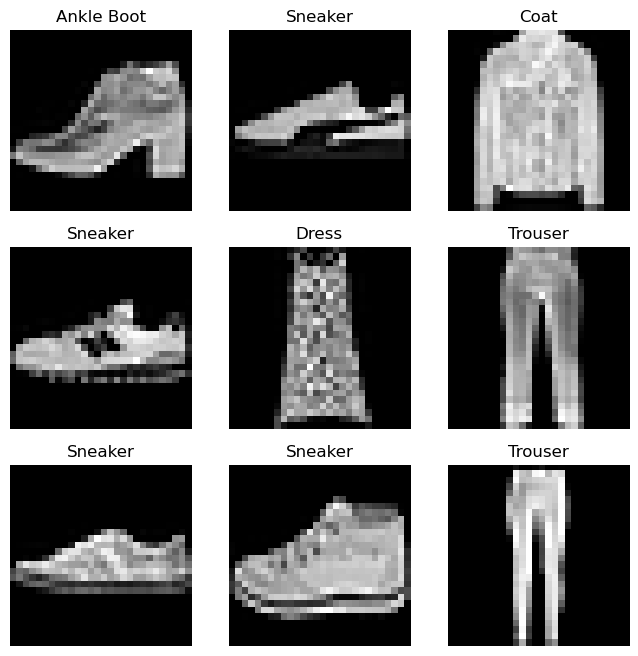

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, 1)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Create custom dataset for our own files

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Dataloaders

usually the data will be huge so we need a good way to load this data for training where we pass data in small batches, shuffled and utilizing python's multiprocessing.

In [6]:
from torch.utils.data import DataLoader

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterate over data

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


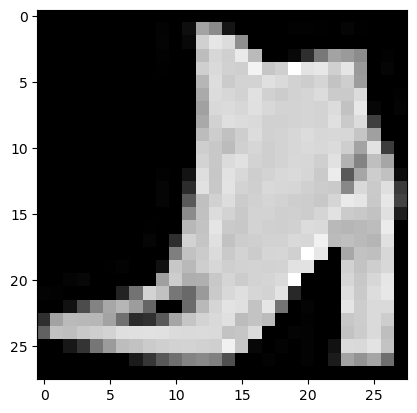

Label: 9


In [8]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Feature batch shape: torch.Size([64, 1, 28, 28])

64 - batch size

1 - color channel

28 - height

28 - width